<a href="https://colab.research.google.com/github/kdambrowski/Data_science/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import pandas as pd
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [ ]:

def load_dataset(filename, class_column, index_col=None):
    dataset = pd.read_csv(f'ML-datasets/{filename}.csv', index_col=index_col)
    dataset['class'] = dataset[class_column].astype('category').cat.codes
    classes = dataset.pop(class_column).unique()
    return dataset, classes

def prepare_dataset(dataset_name):
    params = {'iris': {'class_column': 'species', 'index_col': None},
              'wine': {'class_column': 'Class', 'index_col': None},
              'glass': {'class_column': 'Type', 'index_col': 'ID'}}
    dataset, classes = load_dataset(dataset_name,
                                    **params[dataset_name])
    y = dataset.pop('class')
    X = dataset
    return X, y, classes

In [ ]:
!git clone https://github.com/matzim95/ML-datasets

Cloning into 'ML-datasets'...
remote: Enumerating objects: 194, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 194 (delta 33), reused 124 (delta 24), pack-reused 60
Receiving objects: 100% (194/194), 35.45 MiB | 27.21 MiB/s, done.
Resolving deltas: 100% (45/45), done.


In [ ]:
# losowe dane dla dwóch klas, przy przesunięciu środka rozkładu
train_data = np.vstack((np.random.normal(size=(100, 2)),
                        np.random.normal(size=(100, 2), loc=2)))
train_labels = np.hstack((np.zeros(100), np.ones(100)))

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(train_data, train_labels)

DecisionTreeClassifier()

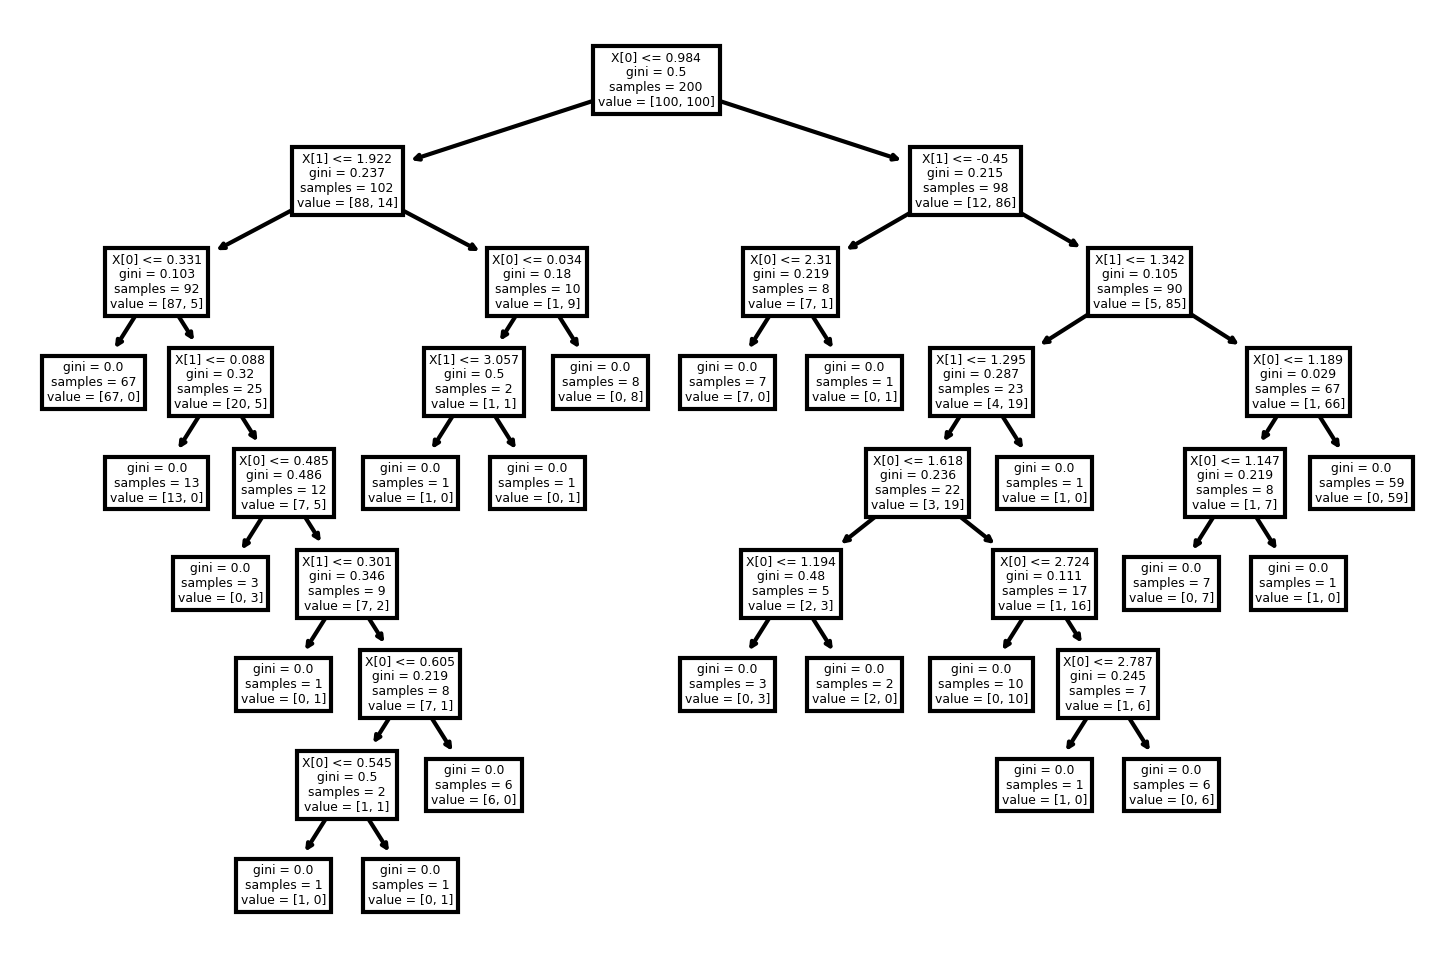

In [ ]:
plt.figure(dpi=300)
plot_tree(clf)
plt.show()

In [ ]:
X, y, classes = prepare_dataset('wine')
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
dt = DecisionTreeClassifier(random_state=3)
dt = dt.fit(X_train, y_train)

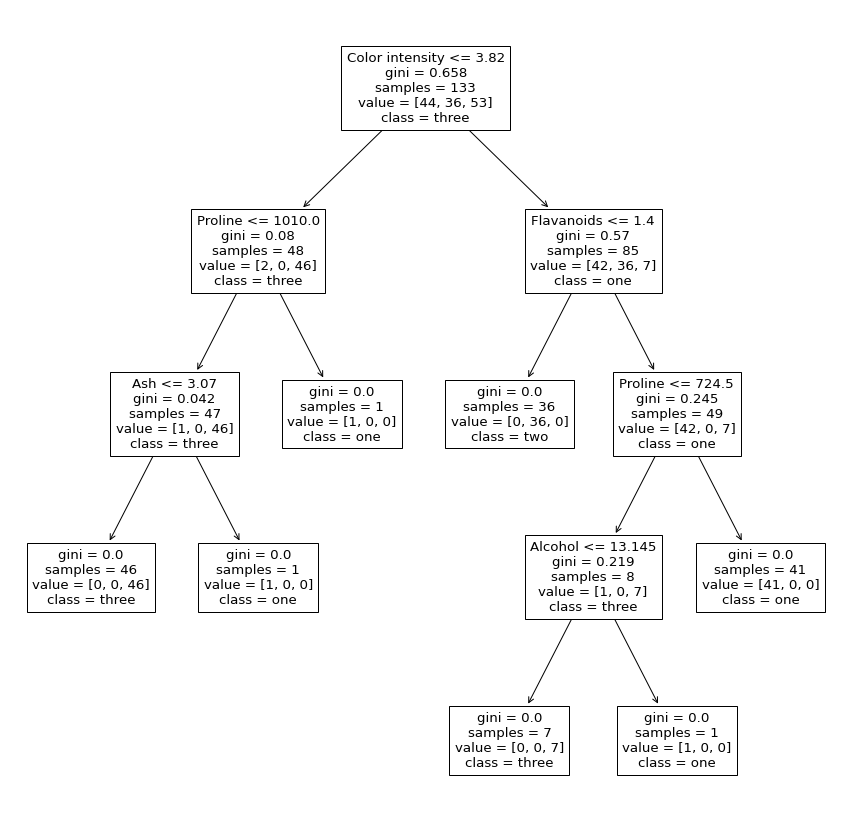

In [ ]:
plt.figure(figsize = (15,15))
plot_tree(dt, feature_names=X.columns, class_names=classes)
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


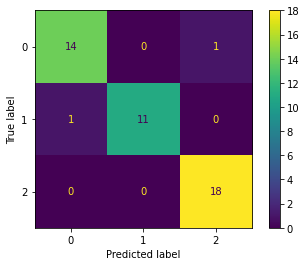

In [ ]:
plot_confusion_matrix(dt, X_test, y_test)

#results evaluata

In [ ]:
path = dt.cost_complexity_pruning_path(X_train, y_train)
alphas = path.ccp_alphas[:-1]

dt_classifiers=[]

for elem in alphas:
  dt = DecisionTreeClassifier(ccp_alpha=elem)
  dt.fit(X_train, y_train)
  dt_classifiers.append(dt)

train_scores = []
for clf in dt_classifiers:
  train_scores.append(clf.score(X_train, y_train))

test_scores = [ clf.score(X_test, y_test) for clf in dt_classifiers ]

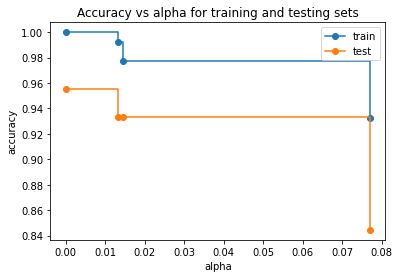

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()


In [ ]:
parameters = {'ccp_alpha': (alphas) }

dt = DecisionTreeClassifier()
clf = GridSearchCV(dt, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.        , 0.01315789, 0.01441103, 0.07706767])})

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


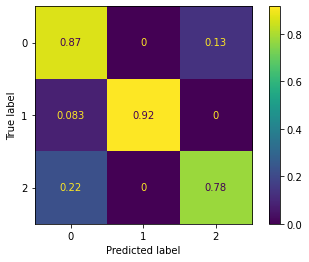

In [ ]:
plot_confusion_matrix(clf, X_test, y_test, normalize='true')

[Text(0.4, 0.8333333333333334, 'Color intensity <= 3.82\ngini = 0.658\nsamples = 133\nvalue = [44, 36, 53]\nclass = three'),
 Text(0.2, 0.5, 'gini = 0.08\nsamples = 48\nvalue = [2, 0, 46]\nclass = three'),
 Text(0.6, 0.5, 'Flavanoids <= 1.4\ngini = 0.57\nsamples = 85\nvalue = [42, 36, 7]\nclass = one'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = two'),
 Text(0.8, 0.16666666666666666, 'gini = 0.245\nsamples = 49\nvalue = [42, 0, 7]\nclass = one')]

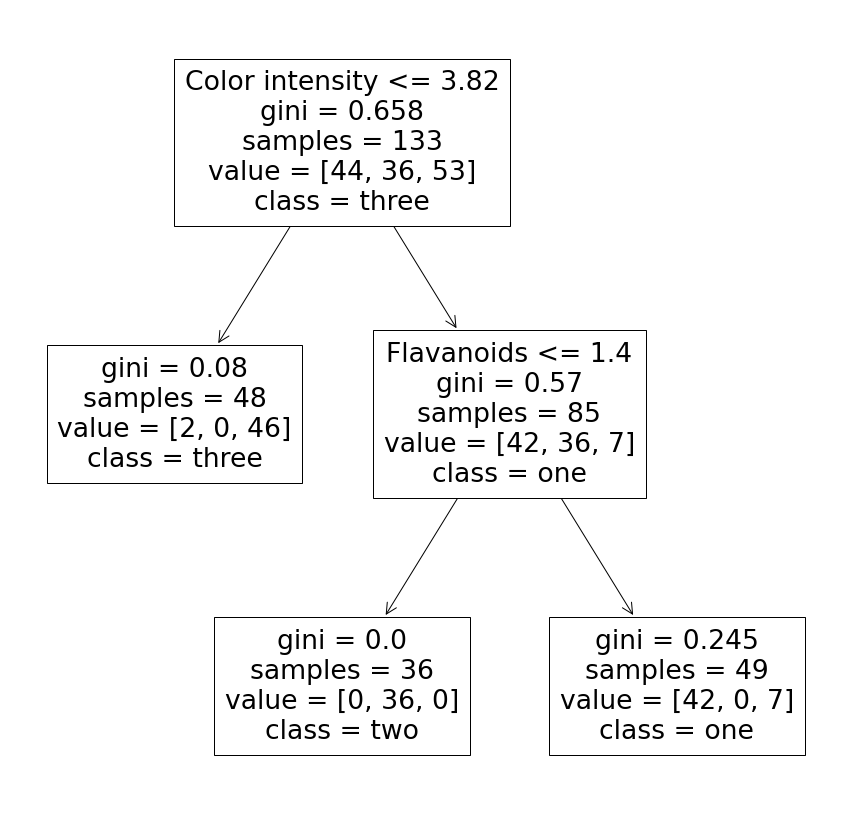

In [ ]:
plt.figure(figsize=(15,15))
plot_tree(clf.best_estimator_,
          feature_names=X.columns,
          class_names=classes
          )

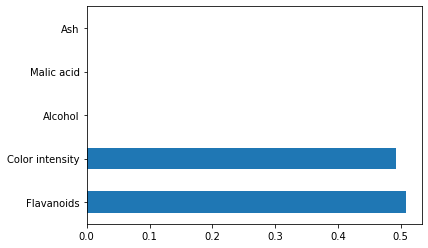

In [ ]:
dt_prunned = clf.best_estimator_
feature_importances = pd.Series(dt_prunned.feature_importances_, 
                                index=X.columns)
feature_importances.nlargest(5).plot(kind='barh')

